In [15]:
import pandas as pd

df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
df.drop(['No','X1 transaction date'], axis=1, inplace=True)
df.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3


In [17]:
df.shape

(414, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [19]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Multivariate plots

<Axes: >

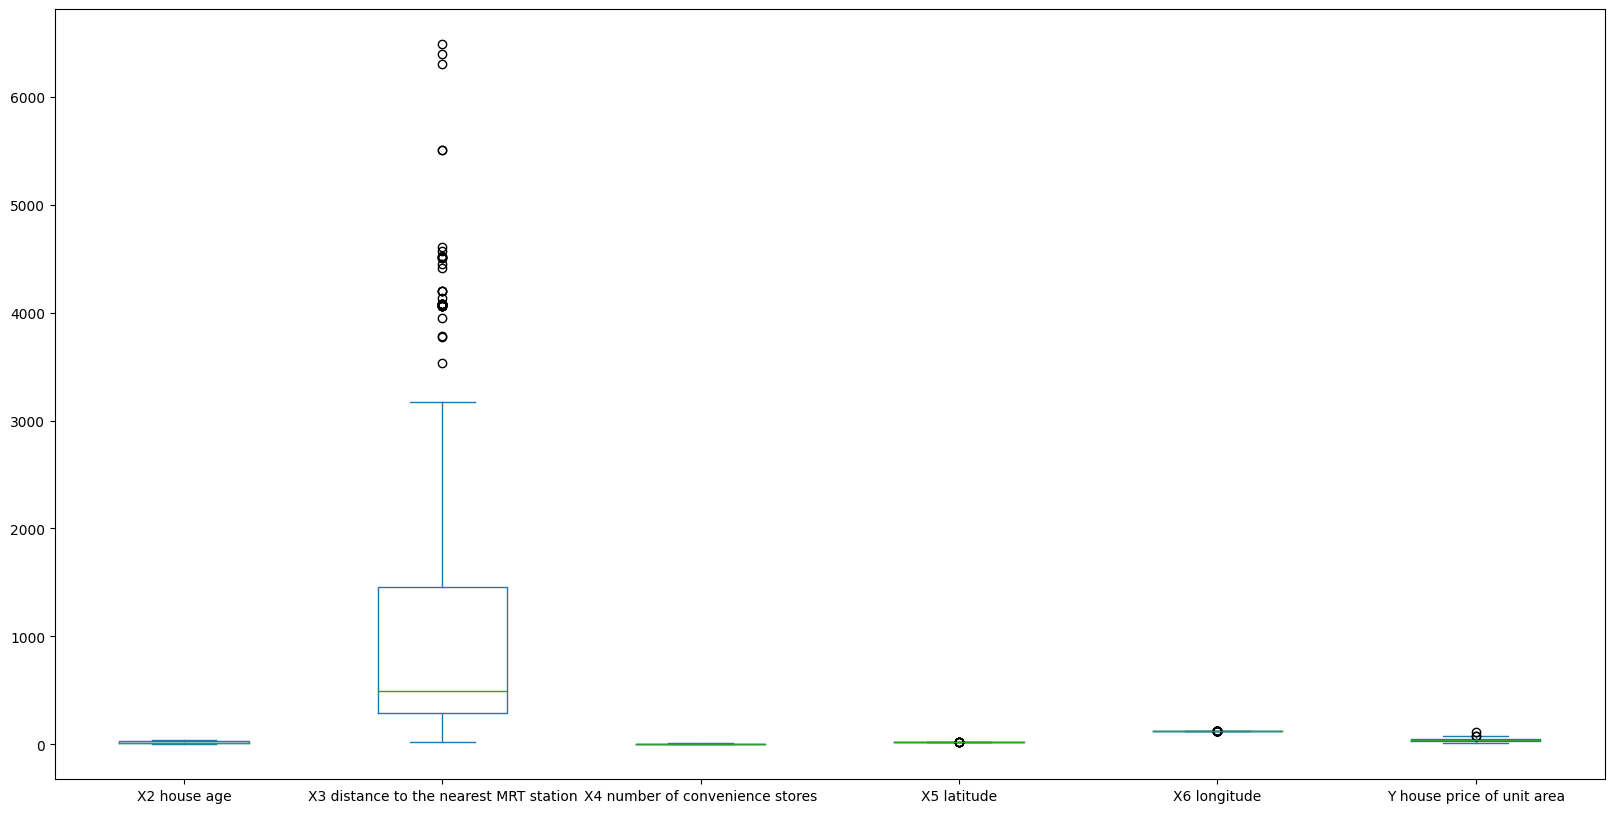

In [20]:
df.plot(kind='box', layout=(2,3), figsize=(20,10))

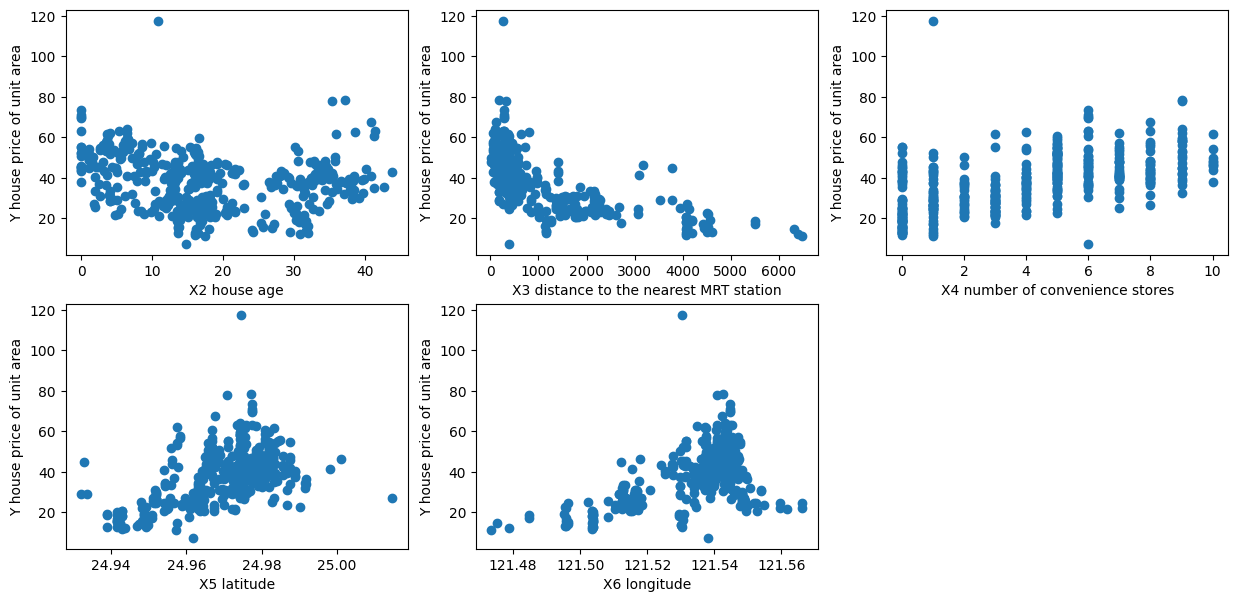

In [21]:
import matplotlib.pyplot as plt

x_columns = df.columns[:-1].tolist()
y_column = df.columns[-1]

plt.figure(figsize=(15,7))
for i in range(len(x_columns)) :
    plt.subplot(2,3,i+1)
    plt.scatter(df[x_columns[i]], df[y_column])
    plt.xlabel(x_columns[i])
    plt.ylabel(y_column)
plt.show()

In [22]:
# correlation -->  1 (strong positive correlation)  ; -1 (strong negative correlation)  ;  0 (no correlation)
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

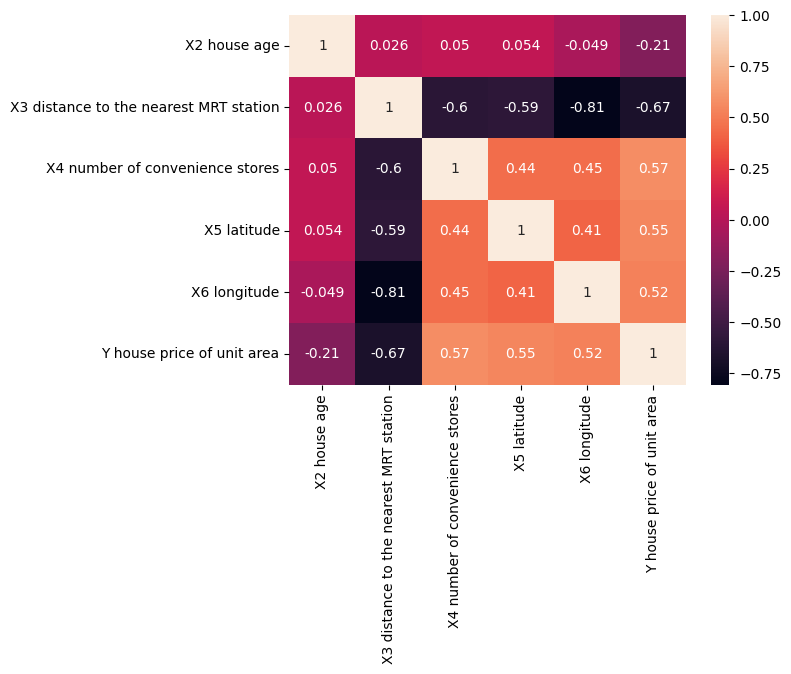

In [23]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [24]:
X = df.iloc[:, 1:5]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def regression_metrics(model, y_test, y_pred):
    print("\t\t", model)
    print("R2 score :", r2_score(y_test,y_pred))
    print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
    print("Mean squared error :", mean_squared_error(y_test,y_pred))
    print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

In [27]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(x_train, y_train)
y_pred1 = reg1.predict(x_test)
regression_metrics("Linear Regression", y_test, y_pred1)

		 Linear Regression
R2 score : 0.46060481541581855
Mean absolute error : 6.254515330214101
Mean squared error : 62.024094690328866
Root Mean squared error : 7.8755377397564965


In [28]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor()
reg2.fit(x_train, y_train)
y_pred2 = reg2.predict(x_test)
regression_metrics("Decision Tree Regressor", y_test, y_pred2)

		 Decision Tree Regressor
R2 score : 0.4467454233960445
Mean absolute error : 5.620086058519793
Mean squared error : 63.61776157418792
Root Mean squared error : 7.976074321004533
